In [1]:
#importar librerias
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt;
from docplex.mp.model import Model;

In [5]:
#Crear datos
N=20;
np.random.seed(1);
x=list(np.random.random(N)*100);
y=list(np.random.random(N)*100);
demanda=list(np.random.randint(low=10,high=50,size=N));

In [8]:
#Definicion de conjuntos
nodos=[i for i in range(N)];
ubicaciones=[i for i in nodos]; #{}: significa creación de un diccionario, fundamental para crear la variables binarias
#Maximo numero de ubicaciones
p=5; 
#Maxima covertura (coverage)
max_cov=10;
#Matriz de distancias
distancia={(i,j):np.hypot(x[i]-x[j],y[i]-y[j]) for i in nodos for j in ubicaciones};
#Matriz que inidica si el nodo i puede ser abastecido por la ubicación j (1), else (0)
a={(i,j):1 if distancia[(i,j)]<=max_cov else 0 for i in nodos for j in ubicaciones};

In [9]:
#Creacion y almacenamiento del modelo en la variable modl
modl=Model('Maximum_CoverageProblem');

In [10]:
#Creacion y almacenamiento de variables 
X=modl.binary_var_dict(nodos,name='X');
Y=modl.binary_var_dict(ubicaciones,name='Y');

In [66]:
#Creación de función objetivo e instruccion de optmizacion
obj=modl.sum(demanda[i]*X[i] for i in nodos);
modl.maximize(obj);

In [67]:
#Creación de restricciones
modl.add_constraints(modl.sum(a[i,j]*Y[j] for j in ubicaciones)>=X[i] for i in nodos);
modl.add_constraint(modl.sum(Y[j] for j in ubicaciones)<=p); #Equivale a una sola restricción
sol=modl.solve(log_output=True);

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 6 rows and 6 columns.
Aggregator did 14 substitutions.
Reduced MIP has 1 rows, 14 columns, and 14 nonzeros.
Reduced MIP has 14 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.06 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 1 rows, 14 columns, and 14 nonzeros.
Reduced MIP has 14 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0               

In [68]:
modl.get_solve_status();

In [69]:
sol.display();

solution for: Maximum_CoverageProblem
objective: 389
X_4 = 1
X_5 = 1
X_6 = 1
X_7 = 1
X_8 = 1
X_9 = 1
X_10 = 1
X_12 = 1
X_16 = 1
X_17 = 1
X_18 = 1
Y_4 = 1
Y_6 = 1
Y_9 = 1
Y_10 = 1
Y_16 = 1


In [70]:
c=modl.objective_value/sum(demanda);
print("La covertura es de: ",round(c*100,2),"%");

La covertura es de:  62.74 %


In [71]:
#Creación de lista con nodos seleccionados
nodos_activos=[k for k in nodos if X[k].solution_value>0.99];
print(nodos_activos);

[4, 5, 6, 7, 8, 9, 10, 12, 16, 17, 18]


In [72]:
#Creación de lista con ubicaciones seleccionadas
ubicaciones_activas=[k for k in ubicaciones if Y[k].solution_value>0.99];
print(ubicaciones_activas);

[4, 6, 9, 10, 16]


4 = coordenadas( 14.675589081711305 , 87.63891522960382 )
6 = coordenadas( 18.62602113776709 , 8.504421136977792 )
9 = coordenadas( 53.88167340033569 , 87.8142503429413 )
10 = coordenadas( 41.91945144032948 , 9.83468338330501 )
16 = coordenadas( 41.730480236712694 , 68.65009276815837 )


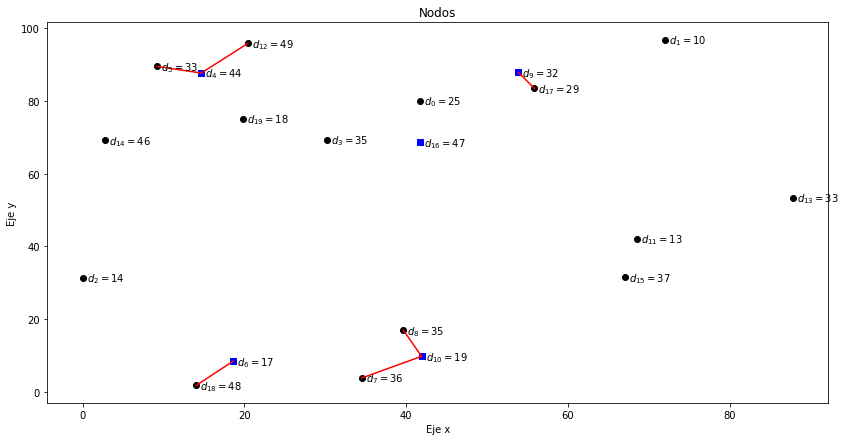

In [73]:
#Creación Gráfico
plt.figure(figsize=(14,7));
plt.scatter(x,y,color="black");

#Codigo que permite anotar etiquetas a los puntos gráficados (nodos)
for i in range(len(x)):
    plt.annotate("$d_{%d}=%d$"%(i,demanda[i]),(x[i]+0.5,y[i]-1),size=10);
    
#Codigo que permite graficar las ubicaciones seleccionadas y con un marcador cuadrado
for n in ubicaciones_activas:
    plt.scatter(x[n],y[n],color="blue",marker="s");
    print(n,"= coordenadas(",x[n],",",y[n],")")
    #Codigo que permite graficar las lineas de conexión entre los nodos y las ubicaciones seleccionadas para su abastecimiento
    for k in range(len(nodos)):
        if a[(n,k)]==1:
            i=n
            j=nodos[k]
            plt.plot([x[i],x[j]],[y[i],y[j]],color="red")
#Codigos para indicar nombre a los ejes y título del gráfico
plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Nodos");
plt.show();